In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import time

# 1. Chrome ÎìúÎùºÏù¥Î≤Ñ ÏÑ§Ï†ï
options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")  # Ï∞Ω ÎùÑÏö∞Í∏∞
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# 2. ÏÇ¨Ïù¥Ìä∏ Ï†ëÏÜç
driver.get("https://quotes.toscrape.com")
time.sleep(2)  # Î°úÎî© ÎåÄÍ∏∞

# 3. "Login" Î≤ÑÌäº ÌÅ¥Î¶≠
login_link = driver.find_element(By.LINK_TEXT, "Login")
login_link.click()

# 4. Í≤∞Í≥º ÌôïÏù∏Ïö© ÎåÄÍ∏∞
time.sleep(3)

# driver.quit()

# ÏõπÏÇ¨Ïù¥Ìä∏ÏóêÏÑú ÏßÅÏ†ë ÌÅ¨Î°§ÎßÅ

In [1]:
import requests
from bs4 import BeautifulSoup

# 1. URL ÏÑ§Ï†ï
url = "http://quotes.toscrape.com/page/1/"

# 2. HTTP ÏöîÏ≤≠
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# 3. Î™ÖÏñ∏Í≥º Ï†ÄÏûê Ï∂îÏ∂ú
quotes = soup.find_all("div", class_="quote")

for quote in quotes:
    text = quote.find("span", class_="text").get_text()
    author = quote.find("small", class_="author").get_text()
    print(f"{text} ‚Äî {author}")

‚ÄúThe world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.‚Äù ‚Äî Albert Einstein
‚ÄúIt is our choices, Harry, that show what we truly are, far more than our abilities.‚Äù ‚Äî J.K. Rowling
‚ÄúThere are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.‚Äù ‚Äî Albert Einstein
‚ÄúThe person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.‚Äù ‚Äî Jane Austen
‚ÄúImperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.‚Äù ‚Äî Marilyn Monroe
‚ÄúTry not to become a man of success. Rather become a man of value.‚Äù ‚Äî Albert Einstein
‚ÄúIt is better to be hated for what you are than to be loved for what you are not.‚Äù ‚Äî Andr√© Gide
‚ÄúI have not failed. I've just found 10,000 ways that won't work.‚Äù ‚Äî Thomas A. Edison
‚ÄúA woman is like a tea bag; you never know how st

# NY Times Ïõπ ÌÅ¨Î°úÎßÅ (API)

In [6]:
import requests 
import pandas as pd 

API_KEY = 'yfiLGtQ4ktpGR3Ge055arXCqWXRcGkGt'

url = 'https://api.nytimes.com/svc/mostpopular/v2/viewed/1.json'
params = {
    "api-key" : API_KEY
}

response = requests.get(url, params=params)

data = response.json()
df = pd.json_normalize(data['results'])
df.head(1)

uri  \
0  nyt://article/145cfe92-7c5f-5da3-8ecf-6167d2e7...   

                                                 url               id  \
0  https://www.nytimes.com/2025/06/17/nyregion/br...  100000010234457   

          asset_id          source published_date              updated  \
0  100000010234457  New York Times     2025-06-17  2025-06-17 18:49:31   

    section subsection nytdsection  ...                 byline     type  \
0  New York               new york  ...  By Luis Ferr√©-Sadurn√≠  Article   

                                               title  \
0  Brad Lander Is Arrested by ICE Agents at Immig...   

                                            abstract  \
0  Mr. Lander, the New York City comptroller and ...   

                                         des_facet  \
0  [Immigration and Emigration, Elections, Mayors]   

                                           org_facet       per_facet  \
0  [Immigration and Customs Enforcement (US), Off...  [Lander, Brad]   

  geo_facet                                              media eta_id  
0        []  [{'type': 'image', 'subtype': 'photo', 'captio...      0  

[1 rows x 22 columns]

# Îã®Ïùº ÌïôÍµêÏùò 1Ïùº Í∏âÏãù Ï†ïÎ≥¥ Í∞ÄÏ†∏Ïò§Í∏∞

In [28]:
import requests
import pandas as pd 

EDU_CODE = 'B10'
SCHOOL_CODE = '7021105'
API_KEY = 'd49ee2210c844960846afdf42bea9644'
TARGET_DATE = '20250616' # ÏàòÏöîÏùº

# ÌïôÍµêÏùò Ïù¥Î¶Ñ Í∞ÄÏ†∏Ïò§Îäî Ìï®Ïàò 
def get_school_name(edu_code, school_code):
    print(f'ÌïôÍµê Ïù¥Î¶Ñ Ï°∞Ìöå ÏòàÏ†ï : ÍµêÏú°Ï≤≠={edu_code}, ÌïôÍµêÏΩîÎìú={school_code}')
    url = 'https://open.neis.go.kr/hub/schoolInfo'
    params = {
        'KEY': API_KEY, 
        'Type' : 'json', 
        'ATPT_OFCDC_SC_CODE' : edu_code, 
        'SD_SCHUL_CODE' : school_code
    }
    try:
        res = requests.get(url, params=params, timeout=5)
        print(f"ÏùëÎãµÏΩîÎìú : {res.status_code}")
        if res.status_code == 200:
            data = res.json()
            if "schoolInfo" in data:
                # Ïó¨Í∏∞ÏΩîÎìúÍ∞Ä ÌïµÏã¨
                # name = data["schoolInfo"][1]["row"][0]["SCHUL_NM"]
                name = data['schoolInfo'][1]['row'][0]['SCHUL_NM']
                print(f"ÌïôÍµêÎ™Ö: {name}")
                return name
            else:
                print("Ìï¥ÎãπÌïôÍµêÎäî Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏùå", data)
        else:
            print("ÏùëÎãµ Ïã§Ìå®:", res.text)
    except Exception as e:
        print(f"ÌïôÍµêÎ™Ö Ï†ïÎ≥¥ Ï°∞Ìöå Ïò§Î•ò : {e}")
    return "ÌïôÍµêÎ™ÖÏ°∞ÌöåÎ∂àÍ∞Ä"
    
def get_meal_info(edu_code, school_code):
    print(f"Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú={TARGET_DATE}")
    url = "https://open.neis.go.kr/hub/mealServiceDietInfo"
    params = {
        "KEY": API_KEY,
        "Type": "json",
        "ATPT_OFCDC_SC_CODE": edu_code,
        "SD_SCHUL_CODE": school_code,
        "MLSV_YMD": TARGET_DATE
    }
    try:
        res = requests.get(url, params=params, timeout=5)
        print(f"mealService ÏùëÎãµÏΩîÎìú: {res.status_code}")
        if res.status_code == 200:
            data = res.json()
            if "mealServiceDietInfo" in data:
                print(f"Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: {len(data['mealServiceDietInfo'][1]['row'])}")
                return data["mealServiceDietInfo"][1]["row"]
            else:
                print("mealServiceDietInfo ÌÇ§ ÏóÜÏùå:", data)
        else:
            print("ÏùëÎãµ Ïã§Ìå®:", res.text)
    except Exception as e:
        print(f"Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ïò§Î•ò: {e}")
    return []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
school_name = get_school_name(EDU_CODE, SCHOOL_CODE)
meals = get_meal_info(EDU_CODE, SCHOOL_CODE)

data = []
for meal in meals:
    data.append({
        "ÍµêÏú°Ï≤≠ÏΩîÎìú": EDU_CODE,
        "ÌïôÍµêÏΩîÎìú": SCHOOL_CODE,
        "ÌïôÍµêÎ™Ö": school_name,
        "Í∏âÏãùÏùºÏûê": meal.get("MLSV_YMD"),
        "ÏãùÏÇ¨Î™Ö": meal.get("MMEAL_SC_NM"),
        "Í∏âÏãùÏãùÎã®": meal.get("DDISH_NM")
    })

df = pd.DataFrame(data)
print("ÏàòÏßëÎêú Ìñâ Ïàò:", len(df))
print(df.head())

df.to_csv("ÏÑúÏö∏_Ï¥àÎì±ÌïôÍµê_Í∏âÏãù_20241030.csv", index=False, encoding="utf-8-sig")
print("CSV Ï†ÄÏû• ÏôÑÎ£å: ÏÑúÏö∏_Ï¥àÎì±ÌïôÍµê_Í∏âÏãù_20241030.csv")

ÌïôÍµê Ïù¥Î¶Ñ Ï°∞Ìöå ÏòàÏ†ï : ÍµêÏú°Ï≤≠=B10, ÌïôÍµêÏΩîÎìú=7021105
ÏùëÎãµÏΩîÎìú : 200
ÌïôÍµêÎ™Ö: ÏÑúÏö∏Ïù¥Î¨∏Ï¥àÎì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 1
ÏàòÏßëÎêú Ìñâ Ïàò: 1
  ÍµêÏú°Ï≤≠ÏΩîÎìú     ÌïôÍµêÏΩîÎìú       ÌïôÍµêÎ™Ö      Í∏âÏãùÏùºÏûê ÏãùÏÇ¨Î™Ö  \
0   B10  7021105  ÏÑúÏö∏Ïù¥Î¨∏Ï¥àÎì±ÌïôÍµê  20250616  Ï§ëÏãù   

                                                Í∏âÏãùÏãùÎã®  
0  Í∑ÄÎ¶¨Î∞•* <br/>Ïú°Í∞úÏû•* (1.5.6.16)<br/>ÏãúÎûòÍ∏∞ÎêúÏû•ÏßÄÏßêy (5.6.16...  
CSV Ï†ÄÏû• ÏôÑÎ£å: ÏÑúÏö∏_Ï¥àÎì±ÌïôÍµê_Í∏âÏãù_20241030.csv


# 1Í∞úÏùò ÌïôÍµê ÌïúÎã¨Í∞Ñ Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
- ÎÇ†ÏßúÎßå Î≥ÄÍ≤Ω

In [33]:
from datetime import datetime, timedelta
today = datetime.today()
one_month_ago = today - timedelta(days=30)
FROM_DATE = one_month_ago.strftime('%Y%m%d')
TO_DATE = today.strftime('%Y%m%d')

FROM_DATE, TO_DATE

('20250519', '20250618')

In [35]:
import requests
import pandas as pd 
from datetime import datetime, timedelta

# ÍµêÏú°Ï≤≠ Î∞è ÌïôÍµê ÏΩîÎìú
EDU_CODE = 'B10'
SCHOOL_CODE = '7021105'
API_KEY = 'd49ee2210c844960846afdf42bea9644'

# ÏµúÍ∑º ÌïúÎã¨ Í∏∞Í∞Ñ ÏÑ§Ï†ï
today = datetime.today()
one_month_ago = today - timedelta(days=30)
FROM_DATE = one_month_ago.strftime('%Y%m%d')
TO_DATE = today.strftime('%Y%m%d')

# ÌïôÍµêÏùò Ïù¥Î¶Ñ Í∞ÄÏ†∏Ïò§Îäî Ìï®Ïàò 
def get_school_name(edu_code, school_code):
    print(f'ÌïôÍµê Ïù¥Î¶Ñ Ï°∞Ìöå ÏòàÏ†ï : ÍµêÏú°Ï≤≠={edu_code}, ÌïôÍµêÏΩîÎìú={school_code}')
    url = 'https://open.neis.go.kr/hub/schoolInfo'
    params = {
        'KEY': API_KEY, 
        'Type' : 'json', 
        'ATPT_OFCDC_SC_CODE' : edu_code, 
        'SD_SCHUL_CODE' : school_code
    }
    try:
        res = requests.get(url, params=params, timeout=5)
        print(f"ÏùëÎãµÏΩîÎìú : {res.status_code}")
        if res.status_code == 200:
            data = res.json()
            if "schoolInfo" in data:
                # Ïó¨Í∏∞ÏΩîÎìúÍ∞Ä ÌïµÏã¨
                # name = data["schoolInfo"][1]["row"][0]["SCHUL_NM"]
                name = data['schoolInfo'][1]['row'][0]['SCHUL_NM']
                print(f"ÌïôÍµêÎ™Ö: {name}")
                return name
            else:
                print("Ìï¥ÎãπÌïôÍµêÎäî Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏùå", data)
        else:
            print("ÏùëÎãµ Ïã§Ìå®:", res.text)
    except Exception as e:
        print(f"ÌïôÍµêÎ™Ö Ï†ïÎ≥¥ Ï°∞Ìöå Ïò§Î•ò : {e}")
    return "ÌïôÍµêÎ™ÖÏ°∞ÌöåÎ∂àÍ∞Ä"
    
def get_meal_info(edu_code, school_code, from_date, to_date):
    print(f"Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú={TARGET_DATE}")
    url = "https://open.neis.go.kr/hub/mealServiceDietInfo"
    params = {
        "KEY": API_KEY,
        "Type": "json",
        "ATPT_OFCDC_SC_CODE": edu_code,
        "SD_SCHUL_CODE": school_code,
        "MLSV_FROM_YMD": from_date, 
        "MLSV_TO_YMD" : to_date, 
        "pIndex" : 1, 
        "pSize" : 100
    }
    try:
        res = requests.get(url, params=params, timeout=5)
        print(f"mealService ÏùëÎãµÏΩîÎìú: {res.status_code}")
        if res.status_code == 200:
            data = res.json()
            if "mealServiceDietInfo" in data:
                print(f"Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: {len(data['mealServiceDietInfo'][1]['row'])}")
                return data["mealServiceDietInfo"][1]["row"]
            else:
                print("mealServiceDietInfo ÌÇ§ ÏóÜÏùå:", data)
        else:
            print("ÏùëÎãµ Ïã§Ìå®:", res.text)
    except Exception as e:
        print(f"Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ïò§Î•ò: {e}")
    return []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
school_name = get_school_name(EDU_CODE, SCHOOL_CODE)
meals = get_meal_info(EDU_CODE, SCHOOL_CODE, FROM_DATE, TO_DATE)

data = []
for meal in meals:
    data.append({
        "ÍµêÏú°Ï≤≠ÏΩîÎìú": EDU_CODE,
        "ÌïôÍµêÏΩîÎìú": SCHOOL_CODE,
        "ÌïôÍµêÎ™Ö": school_name,
        "Í∏âÏãùÏùºÏûê": meal.get("MLSV_YMD"),
        "ÏãùÏÇ¨Î™Ö": meal.get("MMEAL_SC_NM"),
        "Í∏âÏãùÏãùÎã®": meal.get("DDISH_NM")
    })

df = pd.DataFrame(data)
print("ÏàòÏßëÎêú Ìñâ Ïàò:", len(df))
print(df.head())

# df.to_csv("ÏÑúÏö∏_Ï¥àÎì±ÌïôÍµê_Í∏âÏãù_20241030.csv", index=False, encoding="utf-8-sig")
# print("CSV Ï†ÄÏû• ÏôÑÎ£å: ÏÑúÏö∏_Ï¥àÎì±ÌïôÍµê_Í∏âÏãù_20241030.csv")

ÌïôÍµê Ïù¥Î¶Ñ Ï°∞Ìöå ÏòàÏ†ï : ÍµêÏú°Ï≤≠=B10, ÌïôÍµêÏΩîÎìú=7021105
ÏùëÎãµÏΩîÎìú : 200
ÌïôÍµêÎ™Ö: ÏÑúÏö∏Ïù¥Î¨∏Ï¥àÎì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21
ÏàòÏßëÎêú Ìñâ Ïàò: 21
  ÍµêÏú°Ï≤≠ÏΩîÎìú     ÌïôÍµêÏΩîÎìú       ÌïôÍµêÎ™Ö      Í∏âÏãùÏùºÏûê ÏãùÏÇ¨Î™Ö  \
0   B10  7021105  ÏÑúÏö∏Ïù¥Î¨∏Ï¥àÎì±ÌïôÍµê  20250519  Ï§ëÏãù   
1   B10  7021105  ÏÑúÏö∏Ïù¥Î¨∏Ï¥àÎì±ÌïôÍµê  20250520  Ï§ëÏãù   
2   B10  7021105  ÏÑúÏö∏Ïù¥Î¨∏Ï¥àÎì±ÌïôÍµê  20250521  Ï§ëÏãù   
3   B10  7021105  ÏÑúÏö∏Ïù¥Î¨∏Ï¥àÎì±ÌïôÍµê  20250522  Ï§ëÏãù   
4   B10  7021105  ÏÑúÏö∏Ïù¥Î¨∏Ï¥àÎì±ÌïôÍµê  20250523  Ï§ëÏãù   

                                                Í∏âÏãùÏãùÎã®  
0  Ï∞®ÏàòÏàòÎ∞•* <br/>ÍπÄÏπòÏΩ©ÎÇòÎ¨ºÍµ≠^ (5.6.9)<br/>Ïò§Ïù¥Î≥∂Ïùå (5)<br/>ÏàúÏÇ¥...  
1  Í∞ïÌô©Î∞• <br/>Í∞êÏûêÏòπÏã¨Ïù¥Íµ≠ (5.6.17)<br/>ÎØ∏Ïó≠Ï§ÑÍ∏∞Î≥∂Ïùå* (5)<br/>Ïò§...  
2  Î∂ÄÏßÄÍ∞±Ïù¥ÎÇòÎ¨ºÎ∞•&ÏñëÎÖêÏû• (5.6.13)<br/>Î∂ÅÏñ¥Í≥ÑÎûÄÍµ≠* (1.5.6)<br/>ÎπÑÎ¶Ñ...  
3  Í∑ÄÎ¶¨Î∞•* <br/>Ìò∏Î∞ïÏûéÎêú

# ÏÑúÏö∏Ïóê ÏûàÎäî Î™®Îì† Í≥†Îì±ÌïôÍµê ÏµúÍ∑º 1Í∞úÏõî Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
- Í∞ÄÏû• Ï§ëÏöîÌïú Í±¥, ÌïôÍµêÎ™ÖÍ≥º ÌïôÍµêÏΩîÎìúÍ∞Ä ÌïÑÏöî

In [47]:
import requests 
import pandas as pd 
from datetime import datetime, timedelta 
from tqdm import tqdm
import time 

EDU_CODE = 'B10'
API_KEY = 'd49ee2210c844960846afdf42bea9644'

# ÏµúÍ∑º ÌïúÎã¨ Í∏∞Í∞Ñ ÏÑ§Ï†ï
today = datetime.today()
one_month_ago = today - timedelta(days=30)
FROM_DATE = one_month_ago.strftime('%Y%m%d')
TO_DATE = today.strftime('%Y%m%d')

# Í≥†Îì±ÌïôÍµêÎßå Ï°∞Ìöå
def get_highschools(edu_code):
    url = 'https://open.neis.go.kr/hub/schoolInfo'
    params = {
        'KEY': API_KEY, 
        'Type' : 'json', 
        'ATPT_OFCDC_SC_CODE' : edu_code, 
        'pIndex': 1, 
        'pSize': 1000
    }
    highschools = []
    try:
        res = requests.get(url, params=params, timeout=5)
        print(f"ÏùëÎãµÏΩîÎìú : {res.status_code}")
        if res.status_code == 200 and 'schoolInfo' in res.json():
            rows = res.json()['schoolInfo'][1]['row']
            for row in rows:
                if row.get('SCHUL_KND_SC_NM') == 'Í≥†Îì±ÌïôÍµê':
                    highschools.append((row['SD_SCHUL_CODE'], row['SCHUL_NM']))
                else:
                    pass
        else:
            print("200ÏùÄ Îú®ÎÇò, schoolinfoÏùÄ ÏóÜÏùå")
    except Exception as e:
        print("Í≥†Îì±ÌïôÍµê Î™©Î°ù Ïò§Î•ò: {e}")
    return highschools



ÏùëÎãµÏΩîÎìú : 200


178

In [51]:
highschool_list = get_highschools(EDU_CODE)

# ÏµúÍ∑º ÌïúÎã¨ Í∏∞Í∞Ñ ÏÑ§Ï†ï
today = datetime.today()
one_month_ago = today - timedelta(days=30)
FROM_DATE = one_month_ago.strftime('%Y%m%d')
TO_DATE = today.strftime('%Y%m%d')

def get_meal_info(edu_code, school_code, from_date, to_date):
    print(f"Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú={TARGET_DATE}")
    url = "https://open.neis.go.kr/hub/mealServiceDietInfo"
    params = {
        "KEY": API_KEY,
        "Type": "json",
        "ATPT_OFCDC_SC_CODE": edu_code,
        "SD_SCHUL_CODE": school_code,
        "MLSV_FROM_YMD": from_date, 
        "MLSV_TO_YMD" : to_date, 
        "pIndex" : 1, 
        "pSize" : 100
    }
    try:
        res = requests.get(url, params=params, timeout=5)
        print(f"mealService ÏùëÎãµÏΩîÎìú: {res.status_code}")
        if res.status_code == 200:
            data = res.json()
            if "mealServiceDietInfo" in data:
                print(f"Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: {len(data['mealServiceDietInfo'][1]['row'])}")
                return data["mealServiceDietInfo"][1]["row"]
            else:
                print("mealServiceDietInfo ÌÇ§ ÏóÜÏùå:", data)
        else:
            print("ÏùëÎãµ Ïã§Ìå®:", res.text)
    except Exception as e:
        print(f"Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ïò§Î•ò: {e}")
    return []

all_data = []
for school_code, school_name in tqdm(highschool_list, desc="Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå"):
    print(school_code, school_name)
    meals = get_meal_info(EDU_CODE, school_code, FROM_DATE, TO_DATE)
    for meal in meals:
        all_data.append({
            "ÍµêÏú°Ï≤≠ÏΩîÎìú": EDU_CODE,
            "ÌïôÍµêÏΩîÎìú": school_code,
            "ÌïôÍµêÎ™Ö": school_name,
            "Í∏âÏãùÏùºÏûê": meal.get("MLSV_YMD"),
            "ÏãùÏÇ¨Î™Ö": meal.get("MMEAL_SC_NM"),
            "Í∏âÏãùÏãùÎã®": meal.get("DDISH_NM")
        })
    time.sleep(0.1)

# Ï†ÄÏû•
df = pd.DataFrame(all_data)
print("ÏàòÏßëÎêú Í∏âÏãù Ìñâ Ïàò:", len(df))
print(df.head())

ÏùëÎãµÏΩîÎìú : 200


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:   1%|‚ñé                                              | 1/178 [00:00<00:33,  5.28it/s]

7010057 Í∞ÄÎùΩÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21
7011169 Í∞ÄÏû¨Ïö∏Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:   1%|‚ñå                                              | 2/178 [00:00<00:34,  5.11it/s]

7010117 Í∞ïÎèôÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 41


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:   2%|‚ñà                                              | 4/178 [00:00<00:35,  4.84it/s]

7010118 Í∞ïÏÑúÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 42


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:   3%|‚ñà‚ñé                                             | 5/178 [00:01<00:35,  4.84it/s]

7010958 Í∞ïÏùºÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21
7010058 Í∞úÌè¨Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:   3%|‚ñà‚ñå                                             | 6/178 [00:01<00:35,  4.85it/s]

7010119 Í±¥Íµ≠ÎåÄÌïôÍµêÏÇ¨Î≤îÎåÄÌïôÎ∂ÄÏÜçÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 41


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:   4%|‚ñà‚ñä                                             | 7/178 [00:01<00:36,  4.68it/s]

7010059 Í≤ΩÍ∏∞Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 36


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:   5%|‚ñà‚ñà‚ñç                                            | 9/178 [00:01<00:35,  4.80it/s]

7010271 Í≤ΩÍ∏∞Í∏∞Í≥ÑÍ≥µÏóÖÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 59


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:   6%|‚ñà‚ñà‚ñå                                           | 10/178 [00:02<00:34,  4.90it/s]

7010272 Í≤ΩÍ∏∞ÏÉÅÏóÖÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 20
7010060 Í≤ΩÍ∏∞Ïó¨ÏûêÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:   7%|‚ñà‚ñà‚ñà                                           | 12/178 [00:02<00:33,  4.93it/s]

7010061 Í≤ΩÎèôÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21
7010120 Í≤ΩÎ¨∏Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:   8%|‚ñà‚ñà‚ñà‚ñå                                          | 14/178 [00:02<00:33,  4.88it/s]

7010062 Í≤ΩÎ≥µÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21
7010835 Í≤ΩÎ≥µÎπÑÏ¶àÎãàÏä§Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 36


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:   8%|‚ñà‚ñà‚ñà‚ñâ                                          | 15/178 [00:03<00:34,  4.72it/s]

7010122 Í≤ΩÎ≥µÏó¨ÏûêÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 36


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:   9%|‚ñà‚ñà‚ñà‚ñà‚ñè                                         | 16/178 [00:03<00:34,  4.66it/s]

7010124 Í≤ΩÏÑ±Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  10%|‚ñà‚ñà‚ñà‚ñà‚ñç                                         | 17/178 [00:03<00:34,  4.71it/s]

7010125 Í≤ΩÏã†Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 37


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  11%|‚ñà‚ñà‚ñà‚ñà‚ñâ                                         | 19/178 [00:03<00:32,  4.85it/s]

7010563 Í≤ΩÏù∏Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  11%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                        | 20/178 [00:04<00:32,  4.92it/s]

7010698 Í≤ΩÏùºÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21
7010126 Í≤ΩÌù¨Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 41


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  12%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                        | 22/178 [00:04<00:31,  4.90it/s]

7010127 Í≤ΩÌù¨Ïó¨ÏûêÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 38
7011312 Í≥ÑÏÑ±Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 37


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  13%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                        | 23/178 [00:04<00:32,  4.72it/s]

7010797 Í≥†Î†§ÎåÄÌïôÍµêÏÇ¨Î≤îÎåÄÌïôÎ∂ÄÏÜçÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  13%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                       | 24/178 [00:05<00:37,  4.07it/s]

mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21
7011487 Í≥†Î™ÖÏô∏ÏãùÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 20


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  15%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                       | 26/178 [00:05<00:32,  4.68it/s]

7010063 Í≥†Ï≤ôÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  15%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                       | 27/178 [00:05<00:31,  4.78it/s]

7010064 Í≥µÌï≠Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 20
7010065 Í¥ÄÏïÖÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  16%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                      | 29/178 [00:06<00:31,  4.80it/s]

7010066 Í¥ëÎÇ®Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 40
7010131 Í¥ëÎ¨∏Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 33


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  17%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                      | 30/178 [00:06<00:31,  4.69it/s]

7010132 Í¥ëÏÑ±Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 59


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  18%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                     | 32/178 [00:06<00:30,  4.73it/s]

7010133 Í¥ëÏã†Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21
7011488 Í¥ëÏã†Î∞©ÏÜ°ÏòàÏà†Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  19%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                     | 33/178 [00:06<00:28,  5.04it/s]

mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 8
7010067 Í¥ëÏñëÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 20


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  19%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                     | 34/178 [00:07<00:27,  5.20it/s]

7010134 Í¥ëÏòÅÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  20%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                     | 35/178 [00:07<00:29,  4.84it/s]

7010135 Í¥ëÏòÅÏó¨ÏûêÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 37


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  20%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                    | 36/178 [00:07<00:31,  4.57it/s]

7011505 Í¥ëÏö¥Ïù∏Í≥µÏßÄÎä•Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 18


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  21%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                    | 38/178 [00:07<00:28,  4.84it/s]

7010068 Íµ¨Î°úÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  22%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                    | 39/178 [00:08<00:28,  4.91it/s]

7011111 Íµ¨ÏïîÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21
7010069 Íµ¨ÏùºÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  23%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                   | 41/178 [00:08<00:28,  4.85it/s]

7010827 Íµ¨ÌòÑÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  24%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                   | 42/178 [00:08<00:28,  4.84it/s]

1371661 Íµ≠Î¶ΩÍµ≠ÏïÖÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21
1371663 Íµ≠Î¶ΩÏ†ÑÌÜµÏòàÏà†Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 37


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  25%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                  | 44/178 [00:09<00:27,  4.87it/s]

7010071 Í∏àÏò•Ïó¨ÏûêÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21
7010072 Í∏àÏ≤úÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  25%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                  | 45/178 [00:09<00:27,  4.90it/s]

mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21
7011319 Í∏àÌò∏Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  26%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                  | 46/178 [00:09<00:27,  4.80it/s]

mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21
7010136 ÎÇ®Í∞ïÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  26%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                 | 47/178 [00:09<00:28,  4.65it/s]

mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 39
7010564 ÎÖ∏ÏõêÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  28%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                 | 49/178 [00:10<00:25,  5.05it/s]

7010589 ÎàÑÏõêÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  28%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                 | 50/178 [00:10<00:25,  5.01it/s]

7011489 Îã®Íµ≠ÎåÄÌïôÍµêÎ∂ÄÏÜçÏÜåÌîÑÌä∏Ïõ®Ïñ¥Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  29%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                | 51/178 [00:10<00:25,  5.00it/s]

7010137 Îã®Íµ≠ÎåÄÌïôÍµêÏÇ¨Î≤îÎåÄÌïôÎ∂ÄÏÜçÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21
7010073 ÎãπÍ≥°Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 41


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  29%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                | 52/178 [00:10<00:26,  4.81it/s]

7011507 ÎåÄÍ≤ΩÏÉùÌôúÍ≥ºÌïôÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  30%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                | 53/178 [00:11<00:25,  4.88it/s]

7010138 ÎåÄÍ¥ëÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 42


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  31%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                               | 55/178 [00:11<00:25,  4.86it/s]

7010833 ÎåÄÎèôÏÑ∏Î¨¥Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  31%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                               | 56/178 [00:11<00:23,  5.11it/s]

7010139 ÎåÄÏÑ±Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21
7010140 ÎåÄÏã†Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  32%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                               | 57/178 [00:11<00:23,  5.08it/s]

mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21
7010074 ÎåÄÏòÅÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  33%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                               | 58/178 [00:12<00:27,  4.29it/s]

mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21
7010141 ÎåÄÏõêÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  33%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                              | 59/178 [00:12<00:26,  4.48it/s]

mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 35
7010142 ÎåÄÏõêÏó¨ÏûêÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  34%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                              | 60/178 [00:12<00:26,  4.39it/s]

mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 35
7010143 ÎåÄÏõêÏô∏Íµ≠Ïñ¥Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 35


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  35%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                              | 62/178 [00:13<00:25,  4.52it/s]

7010144 ÎåÄÏùºÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  35%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                             | 63/178 [00:13<00:24,  4.74it/s]

7011186 ÎåÄÏùºÍ¥ÄÍ¥ëÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21
7010145 ÎåÄÏùºÏô∏Íµ≠Ïñ¥Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 59


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  37%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                             | 65/178 [00:13<00:25,  4.47it/s]

7010146 ÎåÄÏßÑÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 39


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  37%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                             | 66/178 [00:13<00:24,  4.59it/s]

7010740 ÎåÄÏßÑÎîîÏûêÏù∏Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 20


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  38%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                            | 67/178 [00:14<00:23,  4.69it/s]

7010147 ÎåÄÏßÑÏó¨ÏûêÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 41


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  38%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                            | 68/178 [00:14<00:23,  4.76it/s]

7010148 ÎçïÏÑ±Ïó¨ÏûêÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 36


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  39%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                            | 69/178 [00:14<00:22,  4.82it/s]

7010808 ÎçïÏàòÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21
7010149 ÎçïÏõêÏó¨ÏûêÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 41


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  39%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                            | 70/178 [00:14<00:22,  4.73it/s]

7010150 ÎçïÏõêÏòàÏà†Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 41


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  40%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                           | 72/178 [00:15<00:21,  4.92it/s]

7010317 ÎçïÏùºÏ†ÑÏûêÍ≥µÏóÖÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 20
7011318 ÎèÑÏÑ†Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  41%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                           | 73/178 [00:15<00:21,  4.88it/s]

mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21
7010560 ÎèÖÏÇ∞Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 20


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  42%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                          | 75/178 [00:15<00:20,  4.93it/s]

7011586 ÎèôÍµ≠ÎåÄÌïôÍµêÏÇ¨Î≤îÎåÄÌïôÎ∂ÄÏÜçÍ∞ÄÎûåÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 42
7010151 ÎèôÍµ≠ÎåÄÌïôÍµêÏÇ¨Î≤îÎåÄÌïôÎ∂ÄÏÜçÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 40


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  43%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                          | 77/178 [00:16<00:21,  4.74it/s]

7010152 ÎèôÎçïÏó¨ÏûêÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  44%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                         | 78/178 [00:16<00:19,  5.01it/s]

7011490 ÎèôÎ™ÖÏÉùÌôúÍ≤ΩÏòÅÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 20
7010153 ÎèôÎ™ÖÏó¨ÏûêÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  44%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                         | 79/178 [00:16<00:20,  4.95it/s]

mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 20
7010154 ÎèôÎ∂ÅÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 38


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  45%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                         | 80/178 [00:16<00:19,  4.91it/s]

7010155 ÎèôÏÑ±Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 63


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  46%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                         | 81/178 [00:17<00:21,  4.48it/s]

7010965 ÎèôÏñëÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 37


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  47%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                        | 83/178 [00:17<00:19,  4.77it/s]

7010156 ÎèôÏùºÏó¨ÏûêÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 20
7010075 ÎèôÏûëÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  47%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                        | 84/178 [00:17<00:19,  4.89it/s]

mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 20
7010076 ÎëîÏ¥åÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  48%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                        | 85/178 [00:17<00:18,  4.95it/s]

7010700 Îì±Ï¥åÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  49%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                       | 87/178 [00:18<00:18,  4.89it/s]

7010908 Î¶¨ÎùºÏïÑÌä∏Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 19


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  49%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                       | 88/178 [00:18<00:18,  4.93it/s]

7010157 ÎßàÌè¨Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                       | 89/178 [00:18<00:17,  4.96it/s]

7010077 Î©¥Î™©Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 22
7010158 Î™ÖÎçïÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 69


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                      | 90/178 [00:18<00:18,  4.76it/s]

7010159 Î™ÖÎçïÏó¨ÏûêÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 69


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                      | 91/178 [00:19<00:18,  4.60it/s]

7010160 Î™ÖÎçïÏô∏Íµ≠Ïñ¥Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 69


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                      | 93/178 [00:19<00:17,  4.84it/s]

7010078 Î™ÖÏùºÏó¨ÏûêÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21
7010163 Î™ÖÏßÄÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 41


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                     | 94/178 [00:19<00:17,  4.80it/s]

7010744 Î™©ÎèôÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 41


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                     | 96/178 [00:20<00:17,  4.82it/s]

7010079 Î¨¥ÌïôÏó¨ÏûêÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
mealServiceDietInfo ÌÇ§ ÏóÜÏùå: {'RESULT': {'CODE': 'INFO-200', 'MESSAGE': 'Ìï¥ÎãπÌïòÎäî Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.'}}
7010166 Î¨∏ÏùºÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 42


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                     | 97/178 [00:20<00:18,  4.46it/s]

7010701 Î¨∏Ï†ïÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                    | 99/178 [00:20<00:16,  4.73it/s]

7010959 Î¨∏ÌòÑÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 20
7010591 ÎØ∏ÎûòÏÇ∞ÏóÖÍ≥ºÌïôÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                   | 100/178 [00:21<00:16,  4.69it/s]

7011569 ÎØ∏Î¶ºÎßàÏù¥Ïä§ÌÑ∞Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 58


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                   | 101/178 [00:21<00:16,  4.75it/s]

7010167 ÎØ∏Î¶ºÏó¨ÏûêÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 58


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                   | 102/178 [00:21<00:16,  4.58it/s]

7010080 Î∞òÌè¨Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                  | 104/178 [00:21<00:15,  4.80it/s]

7010590 Î∞©ÏÇ∞Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21
7010168 Î∞∞Î™ÖÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 62


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                  | 105/178 [00:22<00:15,  4.57it/s]

7010169 Î∞∞Î¨∏Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 38


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                  | 106/178 [00:22<00:15,  4.52it/s]

7010170 Î∞∞Ïû¨Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 62


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                 | 108/178 [00:22<00:15,  4.55it/s]

7010171 Î∞∞ÌôîÏó¨ÏûêÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 41
7010172 Î∞±ÏïîÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 35


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                 | 109/178 [00:22<00:14,  4.62it/s]

7010173 Î≥¥ÏÑ±Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 38


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                 | 110/178 [00:23<00:14,  4.54it/s]

7010174 Î≥¥ÏÑ±Ïó¨ÏûêÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                 | 111/178 [00:23<00:14,  4.65it/s]

7010813 Î≥¥Ïù∏Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 59


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                | 113/178 [00:23<00:13,  4.76it/s]

7010736 Î∂àÏïîÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                | 114/178 [00:24<00:13,  4.75it/s]

7010985 ÏÇºÍ∞ÅÏÇ∞Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 19
7010081 ÏÇºÏÑ±Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé               | 116/178 [00:24<00:12,  4.84it/s]

7010082 ÏÉÅÍ≥ÑÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 20


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå               | 117/178 [00:24<00:12,  5.02it/s]

7010593 ÏÉÅÎ™ÖÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21
7010178 ÏÉÅÎ™ÖÎåÄÌïôÍµêÏÇ¨Î≤îÎåÄÌïôÎ∂ÄÏÜçÏó¨ÏûêÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä               | 118/178 [00:24<00:12,  5.00it/s]

mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21
7010179 ÏÉÅÎ¨∏Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 20


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé              | 120/178 [00:25<00:11,  5.16it/s]

7010806 ÏÉÅÏïîÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21
7010916 ÏÉÅÏùºÎØ∏ÎîîÏñ¥Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå              | 121/178 [00:25<00:10,  5.24it/s]

mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21
7010181 ÏÉÅÏùºÏó¨ÏûêÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà              | 123/178 [00:25<00:10,  5.06it/s]

7010182 ÏÑúÎùºÎ≤åÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 35
7010183 ÏÑúÎ¨∏Ïó¨ÏûêÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 37


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå             | 125/178 [00:26<00:10,  4.98it/s]

7010721 ÏÑúÏÑúÏö∏ÏÉùÌôúÍ≥ºÌïôÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 20
7010083 ÏÑúÏö∏Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 41


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä             | 126/178 [00:26<00:11,  4.62it/s]

7010278 ÏÑúÏö∏Í≥µÏóÖÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 19


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà             | 127/178 [00:26<00:11,  4.52it/s]

7010906 ÏÑúÏö∏Í≥µÏó∞ÏòàÏà†Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé            | 128/178 [00:26<00:11,  4.48it/s]

7010084 ÏÑúÏö∏Í≥ºÌïôÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 60


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå            | 129/178 [00:27<00:10,  4.46it/s]

7010739 ÏÑúÏö∏Í¥ÄÍ¥ëÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 19


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä            | 130/178 [00:27<00:10,  4.49it/s]

7010817 ÏÑúÏö∏Íµ≠Ï†úÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 58


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé           | 132/178 [00:27<00:10,  4.43it/s]

7010964 ÏÑúÏö∏Í∏àÏúµÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 20
7011109 ÏÑúÏö∏ÎåÄÌïôÍµêÏÇ¨Î≤îÎåÄÌïôÎ∂ÄÏÑ§Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå           | 133/178 [00:28<00:10,  4.46it/s]

7011180 ÏÑúÏö∏ÎèÑÏãúÍ≥ºÌïôÍ∏∞Ïà†Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 54


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè          | 135/178 [00:28<00:09,  4.49it/s]

7011539 ÏÑúÏö∏ÎèôÍµ¨Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 19
7011494 ÏÑúÏö∏ÎèôÏÇ∞Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã          | 137/178 [00:28<00:08,  4.59it/s]

7010741 ÏÑúÏö∏ÎîîÏûêÏù∏Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ          | 138/178 [00:29<00:08,  4.84it/s]

7011585 ÏÑúÏö∏ÎîîÏßÄÌÑ∏ÏΩòÌÖêÏ∏†Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè         | 139/178 [00:29<00:07,  5.06it/s]

7010572 ÏÑúÏö∏ÎîîÏßÄÌÖçÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21
7010738 ÏÑúÏö∏Î°úÎ¥áÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç         | 140/178 [00:29<00:08,  4.55it/s]

mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 62
7011506 ÏÑúÏö∏Îß§Í∑∏ÎÑ∑Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 20


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã         | 141/178 [00:29<00:07,  4.76it/s]

7010697 ÏÑúÏö∏Î¨∏ÏòÅÏó¨ÏûêÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 41


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ         | 142/178 [00:29<00:07,  4.70it/s]

7010888 ÏÑúÏö∏Î¨∏ÌôîÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 19


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç        | 144/178 [00:30<00:06,  4.94it/s]

7010185 ÏÑúÏö∏ÎØ∏Ïà†Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 18
7011575 ÏÑúÏö∏Î∞òÎèÑÏ≤¥Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã        | 145/178 [00:30<00:06,  4.88it/s]

mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21
7010836 ÏÑúÏö∏Î∞©ÏÜ°Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 20


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè       | 147/178 [00:30<00:06,  5.14it/s]

7011584 ÏÑúÏö∏Î∞±ÏòÅÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 17
7010186 ÏÑúÏö∏ÏÑ∏Ï¢ÖÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç       | 148/178 [00:31<00:05,  5.02it/s]

7011492 ÏÑúÏö∏Ïã†Ï†ïÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ       | 150/178 [00:31<00:05,  4.95it/s]

7010960 ÏÑúÏö∏ÏïÑÏù¥Ìã∞Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè      | 151/178 [00:31<00:05,  4.91it/s]

7010085 ÏÑúÏö∏Ïó¨ÏûêÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 41


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç      | 152/178 [00:31<00:05,  5.04it/s]

7010340 ÏÑúÏö∏Ïó¨ÏûêÏÉÅÏóÖÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 20
7010795 ÏÑúÏö∏ÏòÅÏÉÅÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 55


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ      | 154/178 [00:32<00:04,  4.91it/s]

7010187 ÏÑúÏö∏ÏòàÏà†Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 30


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè     | 155/178 [00:32<00:04,  4.89it/s]

7010188 ÏÑúÏö∏Ïô∏Íµ≠Ïñ¥Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 37
7011558 ÏÑúÏö∏ÏõπÌà∞Ïï†ÎãàÎ©îÏù¥ÏÖòÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 18


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã     | 157/178 [00:33<00:04,  4.97it/s]

7011486 ÏÑúÏö∏ÏùòÎ£åÎ≥¥Í±¥Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21
7011498 ÏÑúÏö∏Ïù∏Í≥µÏßÄÎä•Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 159/178 [00:33<00:03,  5.11it/s]

7011513 ÏÑúÏö∏Ï†ïÌôîÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21
7010086 ÏÑúÏö∏Ï≤¥Ïú°Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 160/178 [00:33<00:03,  4.87it/s]

mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 52
7011213 ÏÑúÏö∏Ïª®Î≤§ÏÖòÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 162/178 [00:33<00:03,  5.26it/s]

7011491 ÏÑúÏùºÎ¨∏ÌôîÏòàÏà†Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 16
7010087 ÏÑúÏ¥àÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 163/178 [00:34<00:02,  5.27it/s]

mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 19
7010088 ÏÑùÍ¥ÄÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 164/178 [00:34<00:02,  5.00it/s]

mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21
7010189 ÏÑ†ÎçïÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 165/178 [00:34<00:02,  4.65it/s]

mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 43
7010536 ÏÑ†Î¶∞Ïù∏ÌÑ∞ÎÑ∑Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 19


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 166/178 [00:34<00:02,  4.95it/s]

7010984 ÏÑ†ÏÇ¨Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 168/178 [00:35<00:01,  5.06it/s]

7010734 ÏÑ†Ïú†Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 20
7011508 ÏÑ†ÏùºÎπÖÎç∞Ïù¥ÌÑ∞Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 169/178 [00:35<00:01,  4.99it/s]

mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21
7010190 ÏÑ†ÏùºÏó¨ÏûêÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 170/178 [00:35<00:01,  5.03it/s]

7010191 ÏÑ†Ï†ïÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 40


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 172/178 [00:36<00:01,  4.89it/s]

7011315 ÏÑ†Ï†ïÍµ≠Ï†úÍ¥ÄÍ¥ëÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 40
7010192 ÏÑ†ÌôîÏòàÏà†Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 62


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 174/178 [00:36<00:00,  4.61it/s]

7010193 ÏÑ±ÎÇ®Í≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 19


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 175/178 [00:36<00:00,  4.68it/s]

7011179 ÏÑ±ÎçïÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 21
7010089 ÏÑ±ÎèôÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 20


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 176/178 [00:36<00:00,  4.71it/s]

7010737 ÏÑ±ÎèôÍ≥µÏóÖÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 38


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:37<00:00,  4.82it/s]

7010889 ÏÑ±ÎèôÍ∏ÄÎ°úÎ≤åÍ≤ΩÏòÅÍ≥†Îì±ÌïôÍµê
Í∏âÏãù Ï†ïÎ≥¥ Ï°∞Ìöå Ï§ë: ÎÇ†Ïßú=20250616
mealService ÏùëÎãµÏΩîÎìú: 200
Í∏âÏãù Îç∞Ïù¥ÌÑ∞ Ïàò: 19


Í≥†Îì±ÌïôÍµê Í∏âÏãù Ï°∞Ìöå: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178/178 [00:37<00:00,  4.77it/s]

ÏàòÏßëÎêú Í∏âÏãù Ìñâ Ïàò: 5222
  ÍµêÏú°Ï≤≠ÏΩîÎìú     ÌïôÍµêÏΩîÎìú     ÌïôÍµêÎ™Ö      Í∏âÏãùÏùºÏûê ÏãùÏÇ¨Î™Ö  \
0   B10  7010057  Í∞ÄÎùΩÍ≥†Îì±ÌïôÍµê  20250519  Ï§ëÏãù   
1   B10  7010057  Í∞ÄÎùΩÍ≥†Îì±ÌïôÍµê  20250520  Ï§ëÏãù   
2   B10  7010057  Í∞ÄÎùΩÍ≥†Îì±ÌïôÍµê  20250521  Ï§ëÏãù   
3   B10  7010057  Í∞ÄÎùΩÍ≥†Îì±ÌïôÍµê  20250522  Ï§ëÏãù   
4   B10  7010057  Í∞ÄÎùΩÍ≥†Îì±ÌïôÍµê  20250523  Ï§ëÏãù   

                                                Í∏âÏãùÏãùÎã®  
0  ÏåÄÎ∞• <br/>ÏÜåÍ≥†Í∏∞ÎØ∏Ïó≠Íµ≠ (2.5.6.15.16.18)<br/>ÎèºÏßÄÍ∞àÎπÑÏ∞ú (5.6...  
1  Ïá†Í≥†Í∏∞ÏΩ©ÎÇòÎ¨ºÎ∞• (5.6.16)<br/>Î¨ºÎßåÎëêÍµ≠ (1.2.5.6.10.15.16.18...  
2  ÏÉàÏö∞Î≥∂ÏùåÎ∞• (1.5.6.8.9.13.18)<br/>Ïî®ÏïóÌò∏Îñ°ÌååÏù¥ (1.2.3.5.6)...  
3  ÏåÄÎ∞• <br/>Î≥∂ÏùåÏö∞Îèô (5.6.8.9.13.15.17.18)<br/>zeroÏ¥àÏΩîÌåå...  
4  ÌòÑÎØ∏Î∞• <br/>Ïñ¥Î¨µÍµ≠ (1.2.5.6.15.16.18)<br/>ÎßàÎùºÏ∞úÎã≠ (5.6....  


In [52]:
df.to_csv("ÏÑúÏö∏_Í≥†Îì±ÌïôÍµê Ï†ÑÏ≤¥_Í∏âÏãù_ÏµúÍ∑º1Í∞úÏõî.csv", index=False, encoding="utf-8-sig")

# 4ÍµêÏãú ÎØ∏ÏÖò
- Ï†ÑÍµ≠ÏãúÎèÑÍµêÏú°Ï≤≠ Í∏∞Î∞òÏúºÎ°ú Í≥†Îì±ÌïôÍµê Ï†ÑÏ≤¥ Í∏âÏãùÎç∞Ïù¥ÌÑ∞ ÏàòÏßë
- ChatGPT ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÍ≥† ÏßÑÌñâ (Î∞òÎ≥µÎ¨∏~Î∞òÎ≥µÎ¨∏~Ï°∞Í±¥Î¨∏, Í∏∞Ï¥àÎ¨∏Î≤ï ÌôïÏû•Ìïú Í∞úÎÖê)

In [54]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
import requests  # HTTP ÏöîÏ≤≠ÏùÑ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨
import pandas as pd  # Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨Î•º ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨
from datetime import datetime, timedelta  # ÎÇ†Ïßú/ÏãúÍ∞Ñ Ï≤òÎ¶¨Î•º ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨
from tqdm import tqdm  # ÏßÑÌñâÎ•† ÌëúÏãúÎ•º ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨
from concurrent.futures import ThreadPoolExecutor, as_completed  # Î≥ëÎ†¨ Ï≤òÎ¶¨Î•º ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨

# Ï†ÑÍµ≠ ÍµêÏú°Ï≤≠ ÏΩîÎìú Î¶¨Ïä§Ìä∏ (17Í∞ú ÏãúÎèÑÍµêÏú°Ï≤≠)
# B10: ÏÑúÏö∏, C10: Î∂ÄÏÇ∞, D10: ÎåÄÍµ¨, E10: Ïù∏Ï≤ú, F10: Í¥ëÏ£º, G10: ÎåÄÏ†Ñ, H10: Ïö∏ÏÇ∞
# I10: ÏÑ∏Ï¢Ö, J10: Í≤ΩÍ∏∞, K10: Í∞ïÏõê, M10: Ï∂©Î∂Å, N10: Ï∂©ÎÇ®, P10: Ï†ÑÎ∂Å, Q10: Ï†ÑÎÇ®, R10: Í≤ΩÎ∂Å, S10: Í≤ΩÎÇ®, T10: Ï†úÏ£º
EDU_CODES = [
    "B10", "C10", "D10", "E10", "F10", "G10", "H10", "I10", "J10",
    "K10", "M10", "N10", "P10", "Q10", "R10", "S10", "T10"
]

# NEIS Open API Ïù∏Ï¶ùÌÇ§
API_KEY = "d49ee2210c844960846afdf42bea9644"

# ÏàòÏßë Í∏∞Í∞Ñ ÏÑ§Ï†ï (ÏµúÍ∑º 1Í∞úÏõî)
today = datetime.today()  # Ïò§Îäò ÎÇ†Ïßú
one_month_ago = today - timedelta(days=30)  # 30Ïùº Ï†Ñ ÎÇ†Ïßú
FROM_DATE = one_month_ago.strftime("%Y%m%d")  # ÏãúÏûëÏùº (YYYYMMDD ÌòïÏãù)
TO_DATE = today.strftime("%Y%m%d")  # Ï¢ÖÎ£åÏùº (YYYYMMDD ÌòïÏãù)

def get_highschools(edu_code):
    """
    ÌäπÏ†ï ÍµêÏú°Ï≤≠Ïùò Í≥†Îì±ÌïôÍµê Î™©Î°ùÏùÑ ÏàòÏßëÌïòÎäî Ìï®Ïàò
    
    Args:
        edu_code (str): ÍµêÏú°Ï≤≠ ÏΩîÎìú (Ïòà: "B10" for ÏÑúÏö∏)
    
    Returns:
        list: (ÍµêÏú°Ï≤≠ÏΩîÎìú, ÌïôÍµêÏΩîÎìú, ÌïôÍµêÎ™Ö) ÌäúÌîåÏùò Î¶¨Ïä§Ìä∏
    """
    url = "https://open.neis.go.kr/hub/schoolInfo"  # NEIS ÌïôÍµêÏ†ïÎ≥¥ API ÏóîÎìúÌè¨Ïù∏Ìä∏
    params = {
        "KEY": API_KEY,  # API Ïù∏Ï¶ùÌÇ§
        "Type": "json",  # ÏùëÎãµ ÌòïÏãù
        "ATPT_OFCDC_SC_CODE": edu_code,  # ÍµêÏú°Ï≤≠ ÏΩîÎìú
        "pIndex": 1,  # ÌéòÏù¥ÏßÄ Î≤àÌò∏
        "pSize": 1000  # ÌéòÏù¥ÏßÄÎãπ Îç∞Ïù¥ÌÑ∞ Ïàò
    }
    highschools = []
    try:
        # API ÏöîÏ≤≠ Ïã§Ìñâ
        res = requests.get(url, params=params, timeout=5)
        # ÏùëÎãµÏù¥ ÏÑ±Í≥µÏù¥Í≥† schoolInfo Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎäî Í≤ΩÏö∞
        if res.status_code == 200 and "schoolInfo" in res.json():
            for row in res.json()["schoolInfo"][1]["row"]:
                # Í≥†Îì±ÌïôÍµêÎßå ÌïÑÌÑ∞ÎßÅ
                if row.get("SCHUL_KND_SC_NM") == "Í≥†Îì±ÌïôÍµê":
                    highschools.append((edu_code, row["SD_SCHUL_CODE"], row["SCHUL_NM"]))
    except Exception as e:
        print(f"üö® {edu_code} Í≥†Îì±ÌïôÍµê Î™©Î°ù Ïò§Î•ò: {e}")
    return highschools

def fetch_meal_data(edu_code, school_code, school_name):
    """
    ÌäπÏ†ï ÌïôÍµêÏùò Í∏âÏãù Ï†ïÎ≥¥Î•º ÏàòÏßëÌïòÎäî Ìï®Ïàò (Î≥ëÎ†¨ Ï≤òÎ¶¨ ÎåÄÏÉÅ)
    
    Args:
        edu_code (str): ÍµêÏú°Ï≤≠ ÏΩîÎìú
        school_code (str): ÌïôÍµê ÏΩîÎìú
        school_name (str): ÌïôÍµêÎ™Ö
    
    Returns:
        list: Í∏âÏãù Ï†ïÎ≥¥ ÎîïÏÖîÎÑàÎ¶¨Ïùò Î¶¨Ïä§Ìä∏
    """
    url = "https://open.neis.go.kr/hub/mealServiceDietInfo"  # NEIS Í∏âÏãùÏ†ïÎ≥¥ API ÏóîÎìúÌè¨Ïù∏Ìä∏
    params = {
        "KEY": API_KEY,  # API Ïù∏Ï¶ùÌÇ§
        "Type": "json",  # ÏùëÎãµ ÌòïÏãù
        "ATPT_OFCDC_SC_CODE": edu_code,  # ÍµêÏú°Ï≤≠ ÏΩîÎìú
        "SD_SCHUL_CODE": school_code,  # ÌïôÍµê ÏΩîÎìú
        "MLSV_FROM_YMD": FROM_DATE,  # Í∏âÏãù ÏãúÏûëÏùº
        "MLSV_TO_YMD": TO_DATE,  # Í∏âÏãù Ï¢ÖÎ£åÏùº
        "pIndex": 1,  # ÌéòÏù¥ÏßÄ Î≤àÌò∏
        "pSize": 100  # ÌéòÏù¥ÏßÄÎãπ Îç∞Ïù¥ÌÑ∞ Ïàò
    }
    try:
        # API ÏöîÏ≤≠ Ïã§Ìñâ
        res = requests.get(url, params=params, timeout=5)
        # ÏùëÎãµÏù¥ ÏÑ±Í≥µÏù¥Í≥† mealServiceDietInfo Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎäî Í≤ΩÏö∞
        if res.status_code == 200 and "mealServiceDietInfo" in res.json():
            meals = res.json()["mealServiceDietInfo"][1]["row"]
            # Í∏âÏãù Îç∞Ïù¥ÌÑ∞Î•º ÎîïÏÖîÎÑàÎ¶¨ ÌòïÌÉúÎ°ú Î≥ÄÌôò
            return [
                {
                    "ÍµêÏú°Ï≤≠ÏΩîÎìú": edu_code,
                    "ÌïôÍµêÏΩîÎìú": school_code,
                    "ÌïôÍµêÎ™Ö": school_name,
                    "Í∏âÏãùÏùºÏûê": meal.get("MLSV_YMD"),  # Í∏âÏãù ÎÇ†Ïßú
                    "ÏãùÏÇ¨Î™Ö": meal.get("MMEAL_SC_NM"),  # ÏãùÏÇ¨ Íµ¨Î∂Ñ (ÏïÑÏπ®, Ï†êÏã¨, Ï†ÄÎÖÅ)
                    "Í∏âÏãùÏãùÎã®": meal.get("DDISH_NM")  # Í∏âÏãù Î©îÎâ¥
                }
                for meal in meals
            ]
    except:
        pass  # Ïò§Î•ò Î∞úÏÉù Ïãú Îπà Î¶¨Ïä§Ìä∏ Î∞òÌôò
    return []

# Ï†ÑÍµ≠ Í≥†Îì±ÌïôÍµê Î™©Î°ù ÏàòÏßë (ÏàúÏ∞® Ï≤òÎ¶¨)
all_highschools = []
for edu_code in tqdm(EDU_CODES, desc="üìö ÍµêÏú°Ï≤≠Î≥Ñ Í≥†Îì±ÌïôÍµê ÏàòÏßë"):
    all_highschools.extend(get_highschools(edu_code))

print(f"Ï†ÑÏ≤¥ Í≥†Îì±ÌïôÍµê Ïàò: {len(all_highschools)}")

# Í∏âÏãù Ï†ïÎ≥¥ Î≥ëÎ†¨ ÏàòÏßë ÏãúÏûë
results = []
with ThreadPoolExecutor(max_workers=20) as executor:  # ÏµúÎåÄ 20Í∞ú Ïä§Î†àÎìúÎ°ú Î≥ëÎ†¨ Ï≤òÎ¶¨
    # Î™®Îì† ÌïôÍµêÏóê ÎåÄÌï¥ Í∏âÏãù Ï†ïÎ≥¥ ÏàòÏßë ÏûëÏóÖ Ï†úÏ∂ú
    futures = [
        executor.submit(fetch_meal_data, edu, sch_code, sch_name)
        for edu, sch_code, sch_name in all_highschools
    ]
    # ÏôÑÎ£åÎêú ÏûëÏóÖÎì§Ïùò Í≤∞Í≥ºÎ•º ÏàòÏßë
    for future in tqdm(as_completed(futures), total=len(futures), desc="üç± Í∏âÏãù Ï†ïÎ≥¥ Î≥ëÎ†¨ ÏàòÏßë"):
        result = future.result()
        if result:  # Í≤∞Í≥ºÍ∞Ä ÏûàÎäî Í≤ΩÏö∞Îßå Ï∂îÍ∞Ä
            results.extend(result)

# ÏàòÏßëÎêú Îç∞Ïù¥ÌÑ∞Î•º DataFrameÏúºÎ°ú Î≥ÄÌôò
df = pd.DataFrame(results)
print("ÏàòÏßëÎêú Ï†ÑÏ≤¥ Í∏âÏãù Ìñâ Ïàò:", len(df))
print(df.head())  # Ï≤òÏùå 5Ìñâ Ï∂úÎ†•

# CSV ÌååÏùºÎ°ú Ï†ÄÏû• (UTF-8 BOM Ïù∏ÏΩîÎî©ÏúºÎ°ú ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄ)
df.to_csv("Ï†ÑÍµ≠_Í≥†Îì±ÌïôÍµê_ÏµúÍ∑º1Í∞úÏõîÍ∏âÏãù_Î≥ëÎ†¨Ï≤òÎ¶¨.csv", index=False, encoding="utf-8-sig")
print("CSV Ï†ÄÏû• ÏôÑÎ£å: Ï†ÑÍµ≠_Í≥†Îì±ÌïôÍµê_ÏµúÍ∑º1Í∞úÏõîÍ∏âÏãù_Î≥ëÎ†¨Ï≤òÎ¶¨.csv")

üìö ÍµêÏú°Ï≤≠Î≥Ñ Í≥†Îì±ÌïôÍµê ÏàòÏßë:  18%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                 | 3/17 [00:05<00:34,  2.47s/it]

üö® D10 Í≥†Îì±ÌïôÍµê Î™©Î°ù Ïò§Î•ò: HTTPSConnectionPool(host='open.neis.go.kr', port=443): Read timed out.


üìö ÍµêÏú°Ï≤≠Î≥Ñ Í≥†Îì±ÌïôÍµê ÏàòÏßë:  24%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                               | 4/17 [00:10<00:45,  3.48s/it]

üö® E10 Í≥†Îì±ÌïôÍµê Î™©Î°ù Ïò§Î•ò: HTTPSConnectionPool(host='open.neis.go.kr', port=443): Max retries exceeded with url: /hub/schoolInfo?KEY=d49ee2210c844960846afdf42bea9644&Type=json&ATPT_OFCDC_SC_CODE=E10&pIndex=1&pSize=1000 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000001BB16FA5D50>, 'Connection to open.neis.go.kr timed out. (connect timeout=5)'))


üìö ÍµêÏú°Ï≤≠Î≥Ñ Í≥†Îì±ÌïôÍµê ÏàòÏßë:  29%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                             | 5/17 [00:15<00:48,  4.03s/it]

üö® F10 Í≥†Îì±ÌïôÍµê Î™©Î°ù Ïò§Î•ò: HTTPSConnectionPool(host='open.neis.go.kr', port=443): Max retries exceeded with url: /hub/schoolInfo?KEY=d49ee2210c844960846afdf42bea9644&Type=json&ATPT_OFCDC_SC_CODE=F10&pIndex=1&pSize=1000 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000001BB1741D290>, 'Connection to open.neis.go.kr timed out. (connect timeout=5)'))


üìö ÍµêÏú°Ï≤≠Î≥Ñ Í≥†Îì±ÌïôÍµê ÏàòÏßë:  35%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                          | 6/17 [00:20<00:48,  4.36s/it]

üö® G10 Í≥†Îì±ÌïôÍµê Î™©Î°ù Ïò§Î•ò: HTTPSConnectionPool(host='open.neis.go.kr', port=443): Max retries exceeded with url: /hub/schoolInfo?KEY=d49ee2210c844960846afdf42bea9644&Type=json&ATPT_OFCDC_SC_CODE=G10&pIndex=1&pSize=1000 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000001BB17438850>, 'Connection to open.neis.go.kr timed out. (connect timeout=5)'))


üìö ÍµêÏú°Ï≤≠Î≥Ñ Í≥†Îì±ÌïôÍµê ÏàòÏßë:  41%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                        | 7/17 [00:25<00:45,  4.58s/it]

üö® H10 Í≥†Îì±ÌïôÍµê Î™©Î°ù Ïò§Î•ò: HTTPSConnectionPool(host='open.neis.go.kr', port=443): Max retries exceeded with url: /hub/schoolInfo?KEY=d49ee2210c844960846afdf42bea9644&Type=json&ATPT_OFCDC_SC_CODE=H10&pIndex=1&pSize=1000 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000001BB16F4F4D0>, 'Connection to open.neis.go.kr timed out. (connect timeout=5)'))


üìö ÍµêÏú°Ï≤≠Î≥Ñ Í≥†Îì±ÌïôÍµê ÏàòÏßë:  47%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                     | 8/17 [00:30<00:42,  4.71s/it]

üö® I10 Í≥†Îì±ÌïôÍµê Î™©Î°ù Ïò§Î•ò: HTTPSConnectionPool(host='open.neis.go.kr', port=443): Max retries exceeded with url: /hub/schoolInfo?KEY=d49ee2210c844960846afdf42bea9644&Type=json&ATPT_OFCDC_SC_CODE=I10&pIndex=1&pSize=1000 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000001BB174F9A10>, 'Connection to open.neis.go.kr timed out. (connect timeout=5)'))


üìö ÍµêÏú°Ï≤≠Î≥Ñ Í≥†Îì±ÌïôÍµê ÏàòÏßë: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 17/17 [00:33<00:00,  2.00s/it]


Ï†ÑÏ≤¥ Í≥†Îì±ÌïôÍµê Ïàò: 1508


üç± Í∏âÏãù Ï†ïÎ≥¥ Î≥ëÎ†¨ ÏàòÏßë: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1508/1508 [02:50<00:00,  8.86it/s]


ÏàòÏßëÎêú Ï†ÑÏ≤¥ Í∏âÏãù Ìñâ Ïàò: 38964
  ÍµêÏú°Ï≤≠ÏΩîÎìú     ÌïôÍµêÏΩîÎìú       ÌïôÍµêÎ™Ö      Í∏âÏãùÏùºÏûê ÏãùÏÇ¨Î™Ö  \
0   B10  7010272  Í≤ΩÍ∏∞ÏÉÅÏóÖÍ≥†Îì±ÌïôÍµê  20250519  Ï§ëÏãù   
1   B10  7010272  Í≤ΩÍ∏∞ÏÉÅÏóÖÍ≥†Îì±ÌïôÍµê  20250520  Ï§ëÏãù   
2   B10  7010272  Í≤ΩÍ∏∞ÏÉÅÏóÖÍ≥†Îì±ÌïôÍµê  20250521  Ï§ëÏãù   
3   B10  7010272  Í≤ΩÍ∏∞ÏÉÅÏóÖÍ≥†Îì±ÌïôÍµê  20250522  Ï§ëÏãù   
4   B10  7010272  Í≤ΩÍ∏∞ÏÉÅÏóÖÍ≥†Îì±ÌïôÍµê  20250523  Ï§ëÏãù   

                                                Í∏âÏãùÏãùÎã®  
0  ÌïòÏù¥ÎùºÏù¥Ïä§ (1.2.5.6.10.12.16)<br/>ÌéòÏä§Ï∏ÑÎßÅÎèÑÍ∑∏ (1.2.5.6.1...  
1  ÌùëÎØ∏Î∞• <br/>Îì§Íπ®ÏàòÏ†úÎπÑÍµ≠ (5.6.8.9.18)<br/>Îß§Ïö¥ÎèºÏßÄÍ∞àÎπÑÏ∞ú (5.6....  
2  Î≤†Ïù¥Ïª®ÍπÄÏπòÎ≥∂ÏùåÎ∞• (2.5.6.9.10.13.18)<br/>Ïú†Î∂ÄÏû•Íµ≠ (5.6.8.9....  
3  ÌòÑÎØ∏Î∞• <br/>ÏÇ¨Í≥®Ïö∞Í±∞ÏßÄÍµ≠ (5.6.13.16)<br/>ÏñëÎ∞∞Ï∂îÏ∞ú*ÏåàÏû• (5.6.1...  
4  Ï∞®ÏàòÏàòÎ∞• <br/>Ïò§ÏßïÏñ¥Î¨¥Íµ≠ (8.9.17.18)<br/>Îã≠Î≥∂ÏùåÌÉï (6.13.15....  
CSV Ï†ÄÏû• ÏôÑÎ£å: Ï†ÑÍµ≠_Í≥†Îì±ÌïôÍµê_ÏµúÍ∑º1Í∞úÏõîÍ∏âÏãù_Î≥ëÎ†¨Ï≤òÎ¶¨.csv


# Í∞ÑÎã® ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú ÏûëÏÑ±

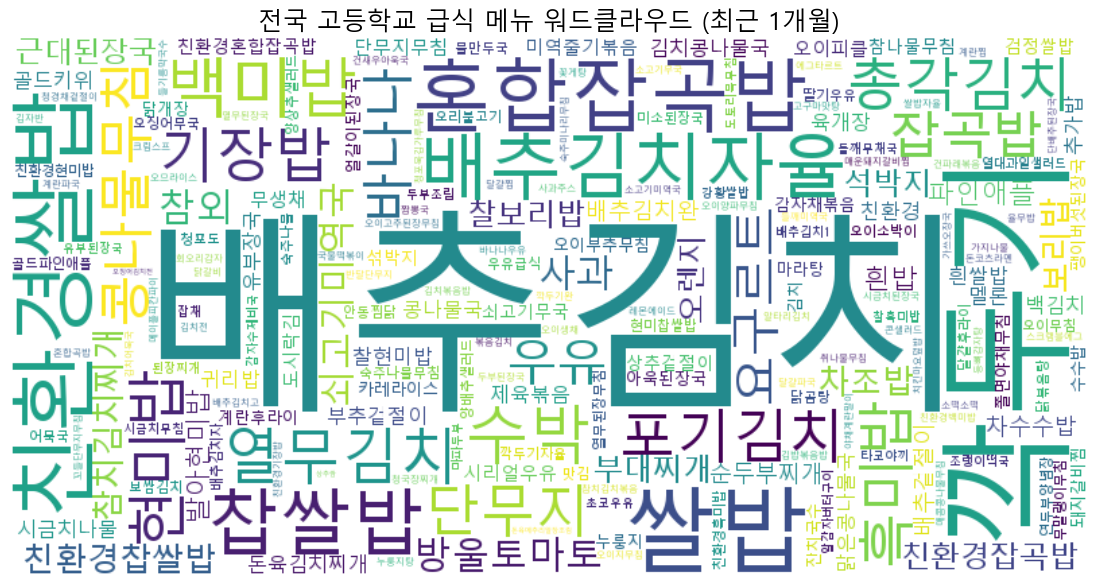

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Î©îÎâ¥ Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò (Ïù¥ÎØ∏ Ïã§ÌñâÌïú Í≤ΩÏö∞ ÏÉùÎûµ Í∞ÄÎä•)
def preprocess_menu_text(text_series):
    text_series = text_series.dropna().str.replace("<br/>", " ").str.replace("<br />", " ")
    words = text_series.str.split().explode()
    words = words[~words.str.contains(r"^\(.*\)$")]
    words = words.str.replace(r"[^\uAC00-\uD7A3a-zA-Z0-9]", "", regex=True)
    words = words[words.str.len() > 1]
    return words

# Ï†ÑÏ≤òÎ¶¨ + ÎπàÎèÑÏàò Í≥ÑÏÇ∞
words = preprocess_menu_text(df["Í∏âÏãùÏãùÎã®"])
freq_dict = Counter(words)

# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
wordcloud = WordCloud(
    font_path="C:/Windows/Fonts/malgun.ttf",  # ‚¨ÖÔ∏è Windows Í∏∞Ï§Ä ÎßëÏùÄ Í≥†Îîï Í≤ΩÎ°ú
    width=800,
    height=400,
    background_color="white"
).generate_from_frequencies(freq_dict)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Ï†ÑÍµ≠ Í≥†Îì±ÌïôÍµê Í∏âÏãù Î©îÎâ¥ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú (ÏµúÍ∑º 1Í∞úÏõî)", fontsize=18, fontname='Malgun Gothic')
plt.show()

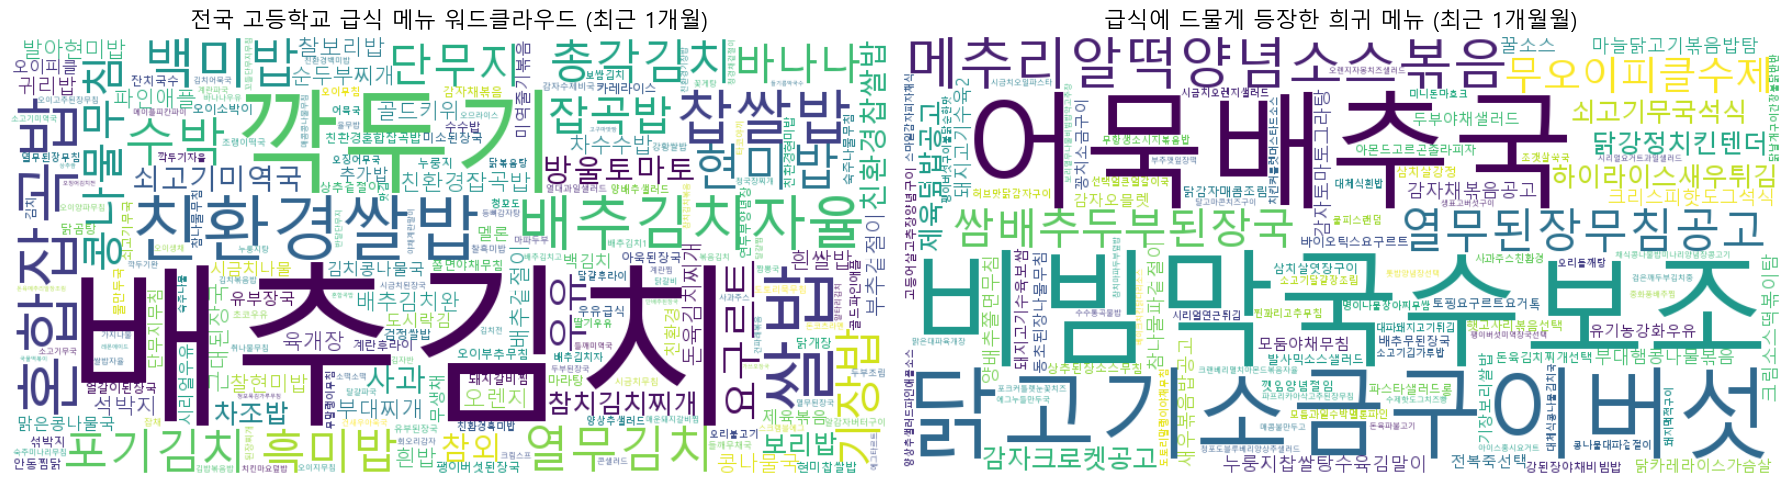

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.font_manager as fm

# 
def preprocess_menu_text(text_series):
    text_series = text_series.dropna().str.replace("<br/>", " ").str.replace("<br />", " ")
    words = text_series.str.split().explode()
    words = words[~words.str.contains(r"^\(.*\)$")]
    words = words.str.replace(r"[^\uAC00-\uD7A3a-zA-Z0-9]", "", regex=True)
    words = words[words.str.len() > 1]
    return words

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞è ÎπàÎèÑ Í≥ÑÏÇ∞
words = preprocess_menu_text(df["Í∏âÏãùÏãùÎã®"])
freq_dict = Counter(words)
rare_menus = dict(Counter(words).most_common()[::-1][:100])

# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
wordcloud_common = WordCloud(
    font_path="C:/Windows/Fonts/malgun.ttf",  # ÎßëÏùÄ Í≥†Îîï Ìè∞Ìä∏ Ï†ÅÏö©
    width=800,
    height=400,
    background_color="white"
).generate_from_frequencies(freq_dict)

wordcloud_rare = WordCloud(
    font_path="C:/Windows/Fonts/malgun.ttf",  # ÎßëÏùÄ Í≥†Îîï Ìè∞Ìä∏ Ï†ÅÏö©
    width=800,
    height=400,
    background_color="white"
).generate_from_frequencies(rare_menus)

# ‚ñ∂ 1x2 ÌòïÌÉú ÏãúÍ∞ÅÌôî
plt.rcParams['font.family'] = 'Malgun Gothic'  # Ï†ÑÏó≠ Ìè∞Ìä∏ ÏÑ§Ï†ï
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

axes[0].imshow(wordcloud_common, interpolation="bilinear")
axes[0].axis("off")
axes[0].set_title("Ï†ÑÍµ≠ Í≥†Îì±ÌïôÍµê Í∏âÏãù Î©îÎâ¥ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú (ÏµúÍ∑º 1Í∞úÏõî)", fontsize=16)

axes[1].imshow(wordcloud_rare, interpolation="bilinear")
axes[1].axis("off")
axes[1].set_title("Í∏âÏãùÏóê ÎìúÎ¨ºÍ≤å Îì±Ïû•Ìïú Ìù¨Í∑Ä Î©îÎâ¥ (ÏµúÍ∑º 1Í∞úÏõîÏõî)", fontsize=16)

plt.tight_layout()
plt.show()